In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
# Cargar datos desde mineriaInfo.json
df_conflicto = pd.read_csv('../Datos/procesados/conflicto.csv')

df_conflicto.head()

,CodigoEntidad,DatoNumerico,Anio,Mes
0,17000.0,319.0,1984.0,12.0
1,17001.0,50.0,1984.0,12.0
2,17013.0,0.0,1984.0,12.0
3,17042.0,10.0,1984.0,12.0
4,17050.0,1.0,1984.0,12.0


In [67]:
# Cargar datos desde mineriaInfo.json
df_mineria = pd.read_csv('../Datos/procesados/mineria.csv')

In [59]:
df_municipio = pd.read_csv('../Datos/procesados/departamentos.csv')

In [68]:
# Cargar datos coordenadas
df_coordenadas = pd.read_csv('../Datos/coordenadas/worldcities.csv')
df_coordenadas.sample(5)

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
234,Guamal,9.1442,-74.2236,Colombia,CO,Magdalena,minor,28277.0,28277.0
536,Apartadó,7.8830,-76.6259,Colombia,CO,Antioquia,minor,NaN,NaN
1045,Albania,1.3289,-75.8783,Colombia,CO,Caquetá,minor,NaN,NaN
79,Santa Rosa de Cabal,4.8672,-75.6211,Colombia,CO,Risaralda,minor,73028.0,73028.0
257,Yolombó,6.5978,-75.0122,Colombia,CO,Antioquia,minor,25647.0,25647.0


In [69]:
# Create new column named lat with null values
df_municipio['lat'] = np.nan

# Create new column named lon with null values
df_municipio['lng'] = np.nan

# Iterate over the rows of df_municipio
for index, row in df_municipio.iterrows():
    # Verify if row['Entidad'] is in df_coordenadas['city']
    if row['Entidad'] in df_coordenadas['city'].values:
        # Assign the value of df_coordenadas['lat'] to row['lat']
        row['lat'] = df_coordenadas[df_coordenadas['city'] == row['Entidad']]['lat'].values[0]
        # Assign the value of df_coordenadas['lng'] to row['lng']
        row['lng'] = df_coordenadas[df_coordenadas['city'] == row['Entidad']]['lng'].values[0]
        # If lng is lower than -45, then add
        if row['lng'] < -45:
            # Assign the value of row['lat'] to df_municipio.loc[index, 'lat']
            df_municipio.loc[index, 'lat'] = row['lat']
            # Assign the value of row['lng'] to df_municipio.loc[index, 'lng']
            df_municipio.loc[index, 'lng'] = row['lng']


In [70]:
df_municipio.shape
df_municipio.sample(5)

,CodigoEntidad,Entidad,Departamento,lat,lng
920,68498.0,Ocamonte,Santander,6.3397,-73.1225
157,13052.0,Arjona,Bolívar,10.2550,-75.3447
1076,81591.0,Puerto Rondón,Arauca,6.2800,-71.1003
1044,76246.0,El Cairo,Valle del Cauca,4.7608,-76.2225
416,20045.0,Becerril,Cesar,9.7031,-73.2775


In [71]:
# Export df_municipio to csv
df_municipio.to_csv('../Datos/procesados/departamentos.csv', index=False)

In [64]:
# Merge df_mineria y df_municipio
df_mineria = pd.merge(df_mineria, df_municipio, on='CodigoEntidad')

df_mineria.head()

,CodigoEntidad,recurso_natural,Anio,trimestre,valor_contraprestacion,Entidad,Departamento,lat,lng
0,5001,ARCILLA,2018,4,614258.0,Medellín,Antioquia,6.2447,-75.5748
1,5001,ARCILLAS CERAMICAS,2014,4,2036781.0,Medellín,Antioquia,6.2447,-75.5748
2,5001,ARCILLAS FERRUGINOSAS,2012,1,836927.0,Medellín,Antioquia,6.2447,-75.5748
3,5001,ARCILLAS MISCELANEAS,2019,1,5763839.0,Medellín,Antioquia,6.2447,-75.5748
4,5001,ARCILLAS MISCELANEAS,2019,2,5802546.0,Medellín,Antioquia,6.2447,-75.5748


<AxesSubplot:xlabel='Departamento'>

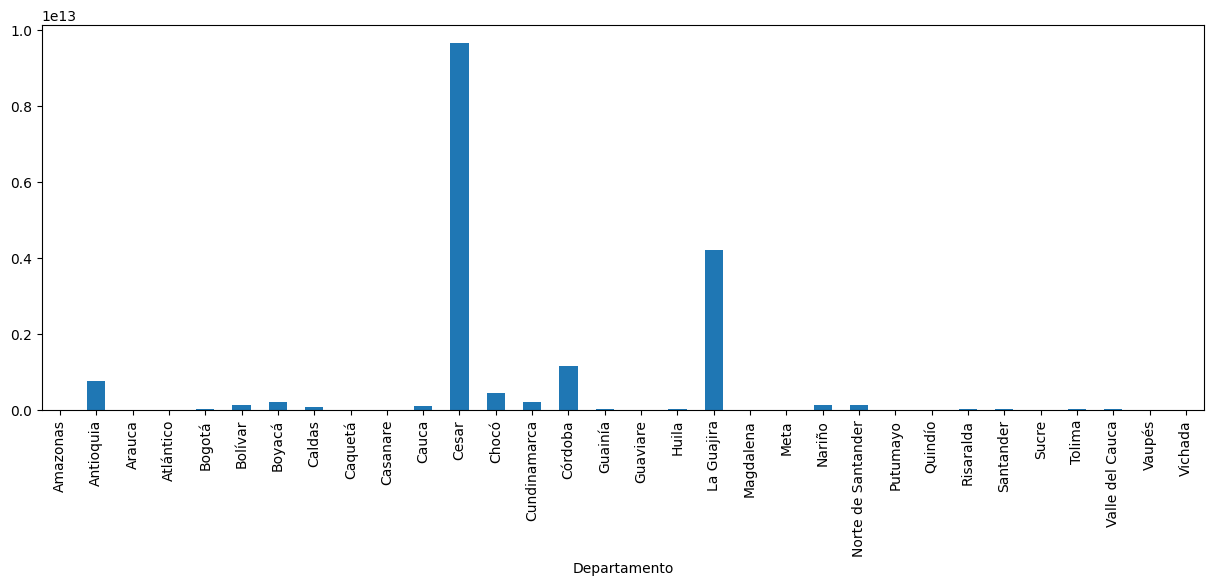

In [66]:
# Graph the sum of valor_contraprestacion in df_mineria per Departamento with value in each bar
df_mineria.groupby('Departamento')['valor_contraprestacion'].sum().plot(kind='bar', figsize=(15, 5))


In [32]:
# Merge df_municipio y df_conflicto
df_municipio_conflicto = pd.merge(df_municipio, df_conflicto, on='CodigoEntidad')

In [15]:
df_municipio_conflicto.sample(5)

,CodigoEntidad,Entidad,Departamento,DatoNumerico,Anio,Mes
21460,41357.0,Iquira,Huila,20.0,1990.0,12.0
28244,54720.0,Sardinata,Norte de Santander,607.0,2008.0,12.0
23847,50000.0,Meta,Meta,3724.0,1997.0,12.0
28264,54743.0,Silos,Norte de Santander,0.0,1994.0,12.0
36411,76895.0,Zarzal,Valle del Cauca,17.0,2015.0,12.0


In [33]:
# Delete rows with Departamento Colombia
df_municipio_conflicto = df_municipio_conflicto[df_municipio_conflicto['Departamento'] != 'Colombia']

<AxesSubplot:xlabel='Departamento'>

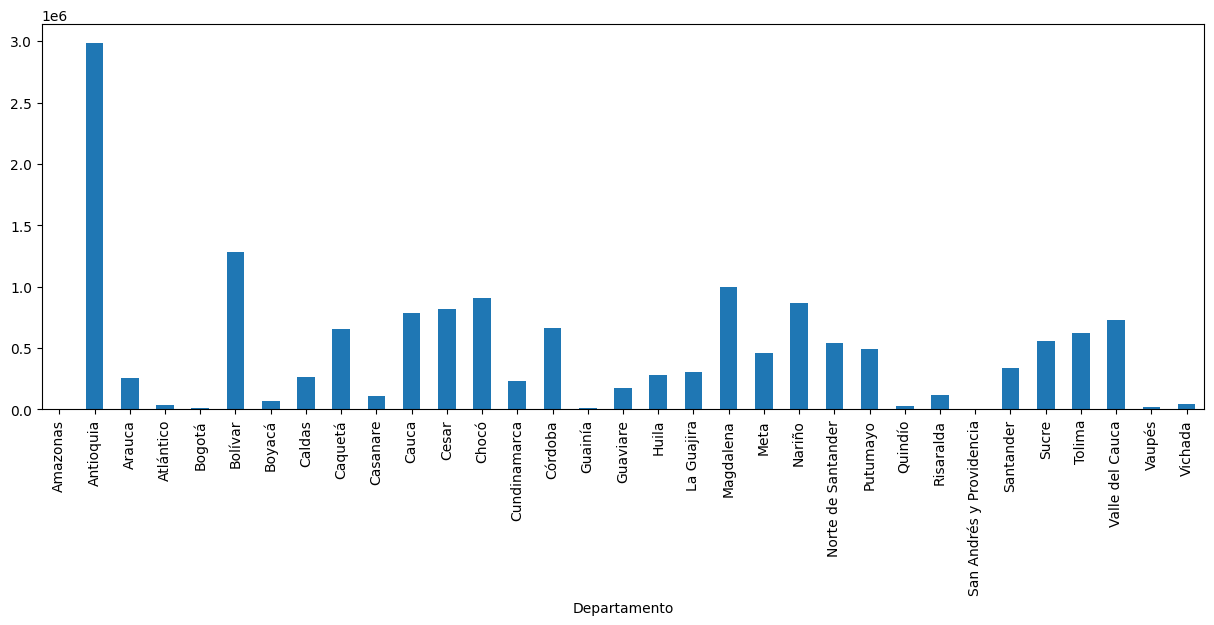

In [34]:
# Graph the sum of DatoNumerico in df_municipio_conflicto per Departamento
df_municipio_conflicto.groupby('Departamento')['DatoNumerico'].sum().plot(kind='bar', figsize=(15, 5))


In [55]:
# Cargar datos demografia
df_demografia = pd.read_csv('../Datos/procesados/demografia.csv')
df_demografia.sample(5)

,CodigoEntidad,DatoNumerico,Anio,Mes
282,17873.0,37.98,2017.0,1.0
285,18029.0,21.81,2017.0,1.0
852,25491.0,34.27,2017.0,1.0
726,76147.0,33.52,2017.0,1.0
804,25168.0,27.00,2017.0,1.0
